In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
  
  
def GetCutToRemoveAlpha(data,alpha):
  cut = int(alpha*len(data))
  return np.sort(data)[cut]

def GetCutToKeepAlpha(data,alpha):
  cut = int(alpha*len(data))
  return np.sort(data)[-cut]

def GetRejection(data,cut):
  return np.sum(data<cut) / len(data)

def GetEfficiency(data,cut):
  return np.sum(data>cut) / len(data)

def plotDLLH(all_dllh,scint_dllh,Lmin,Lmax,cut,nbins=50):
  label_all = 'All Photons (Efficiency: %2.2f)'%GetEfficiency(all_dllh,cut)
  label_scint = 'Scintillation Only (Rejection: %2.2f)'%GetRejection(scint_dllh,cut)
  nall,_,_ = plt.hist(all_dllh,bins=np.linspace(Lmin,Lmax,nbins),alpha=0.5,label=label_all,color='green')
  nscint,_,_ = plt.hist(scint_dllh,bins=np.linspace(Lmin,Lmax,nbins),alpha=0.5,label=label_scint,color='blue')
  plt.xlabel(r'$\log \mathcal{L}_{e^-} - \log \mathcal{L}_{p}$')
  plt.ylabel('Counts')
  plt.semilogy()
  return max(np.max(nall),np.max(nscint))

  

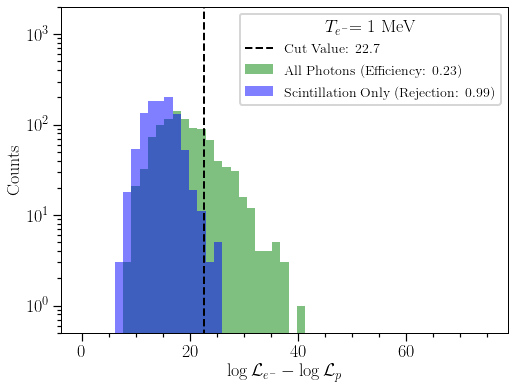

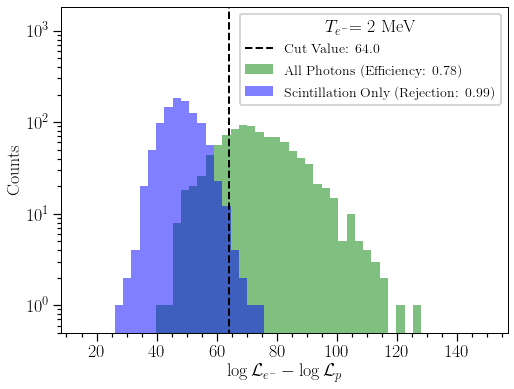

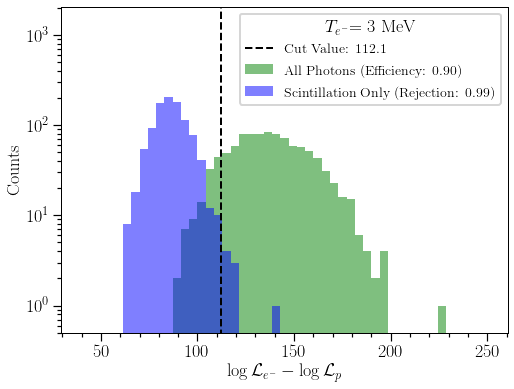

In [31]:
Lminrange=[0,15,40,50,60,80]
Lmaxrange=[75,150,250,450,550,1000]
Erange=[1,2,3]#,4,5,10]
for E,Lmin,Lmax in zip(Erange,Lminrange,Lmaxrange):
  all_dllh = np.load('DeltaLLH_Data/all_dLLH_E%s.npy'%str(E))
  scint_dllh = np.load('DeltaLLH_Data/scint_dLLH_E%s.npy'%str(E))
  cut = GetCutToRemoveAlpha(scint_dllh,0.99)
  nmax = plotDLLH(all_dllh,scint_dllh,Lmin,Lmax,cut)
  plt.plot([cut,cut],[0,10*nmax],color='black',ls='--',label='Cut Value: %2.1f'%cut)
  plt.legend(title=(r'$T_{e^-}$' + '= %s MeV'%str(E)))
  plt.ylim(5e-1,10*nmax)
  plt.savefig('Figures/LLH_figures/DLLH_Plot_E%s.png'%str(E))
  plt.show()